In [12]:
import sys 
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt 

In [13]:
import mplhep as hep
hep.style.use(hep.style.ROOT) 

In [14]:
import h5py
filename = "../../datasets/qubits/00002_IQ_plot_raw.h5"

with h5py.File(filename, "r") as f:
    # print all root level object names/keys
    print("Keys: %s" % f.keys())
    # get list of names/keys
    keys = list(f.keys())

    I_e = list(f[keys[0]])
    adc_e_1 = list(f[keys[4]])
    adc_e_2 = list(f[keys[5]])

Keys: <KeysViewHDF5 ['I_e', 'I_g', 'Q_e', 'Q_g', 'adc_e_1', 'adc_e_2', 'adc_g_1', 'adc_g_2']>


In [15]:
I_e[0].shape # (5000,)
adc_e_1[0].shape # (5000, 2000) 

(5000, 2000)

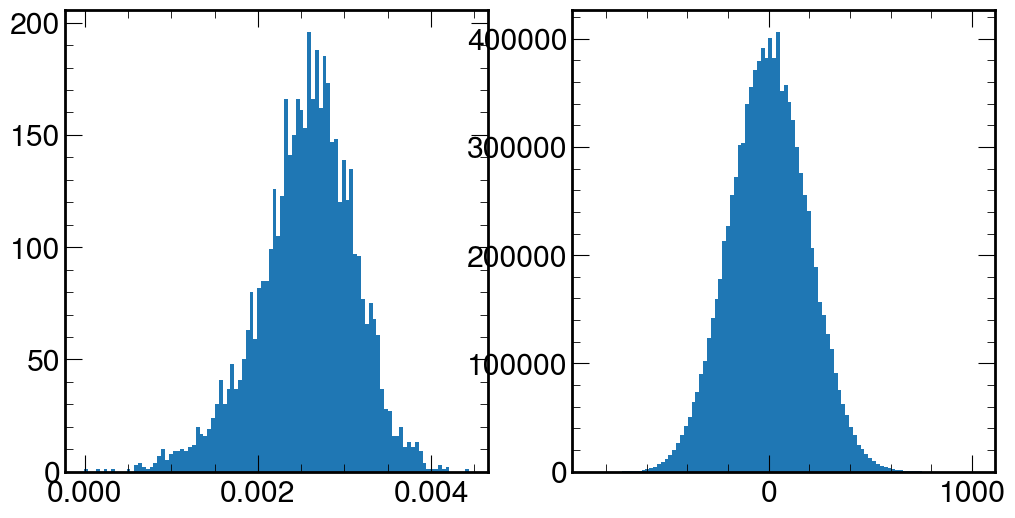

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

_ = axs[0].hist(I_e[0], bins=100)
_ = axs[1].hist(adc_e_1[0].reshape(-1), bins=100)


In [17]:
X_train_val = np.load('../data/X_train_val.npy')
X_test = np.ascontiguousarray(np.load('../data/X_test.npy'))
y_train_val = np.load('../data/y_train_val.npy')
y_test = np.load('../data/y_test.npy', allow_pickle=True) 

In [18]:
print(f'Training size: {len(X_train_val)}')
print(f'Testing size: {len(X_test)}')
print(f'Single sample size: {len(X_train_val[0])}')

Training size: 9000
Testing size: 1000
Single sample size: 2000


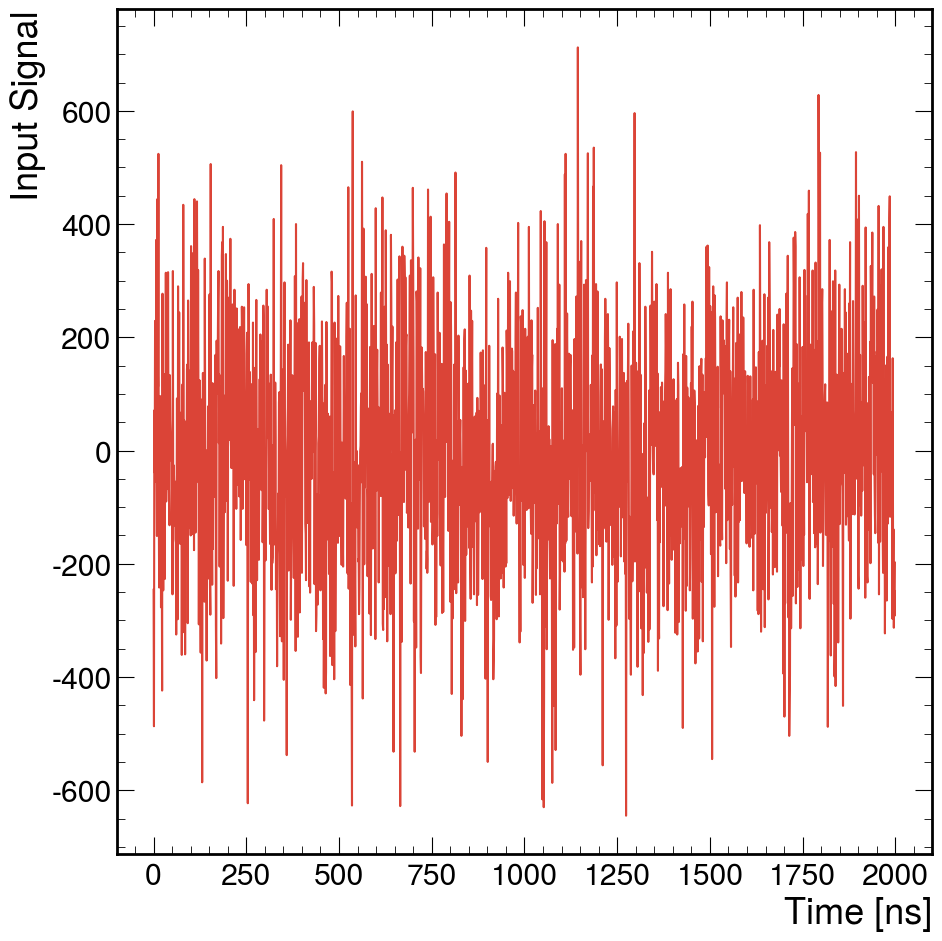

In [19]:
linewidth = 3
linestyle = 'dashdot'
color = 'black'
# colors=["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]

plt.figure()
plt.plot(X_train_val[0], color="#DB4437")

max_ = max(max(X_train_val[0]), -1*min(X_train_val[0])) + 25

# plt.vlines([500], -1*max_, max_, linewidth=linewidth, linestyles=linestyle, color=color)
# plt.vlines([1500], -1*max_, max_, linewidth=linewidth, linestyles=linestyle, color=color)

# plt.hlines([max_-linewidth], 500, 1500, linewidth=linewidth, linestyles=linestyle, color=color)
# plt.hlines([-1*max_+linewidth], 500, 1500, linewidth=linewidth, linestyles=linestyle, color=color)

plt.xlabel('Time [ns]')
plt.ylabel('Input Signal')
plt.tight_layout()

plt.savefig('../images/input.png')

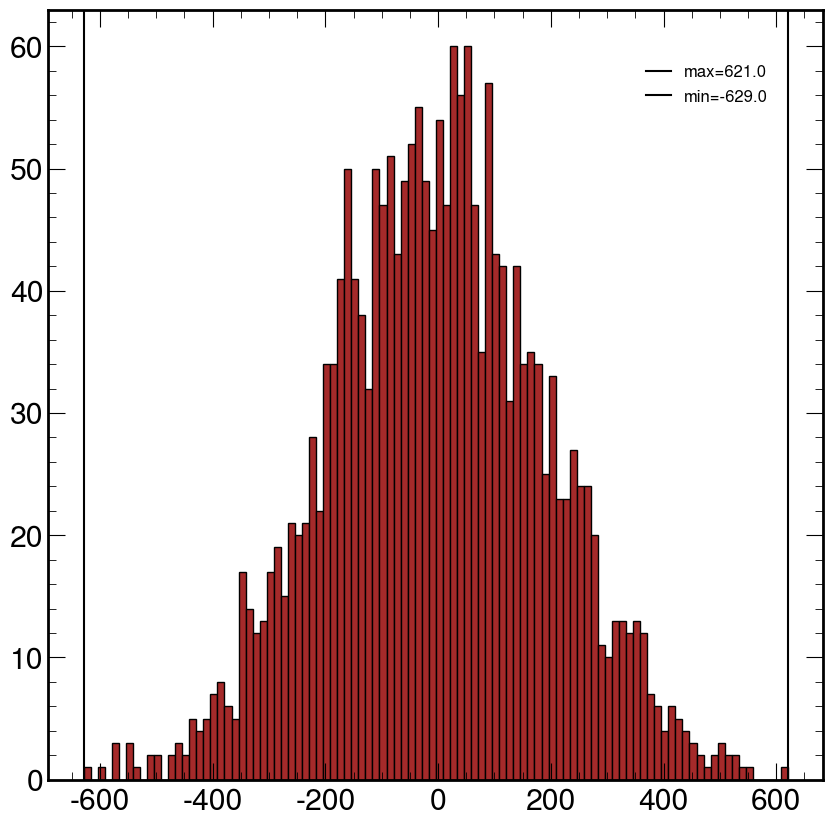

In [27]:
data = X_test[0].reshape(-1)
data_max = data.max()
data_min = data.min()

plt.figure()
_ = plt.hist(data, bins=100, histtype='bar', edgecolor="black", color="brown")
plt.axvline(data_max, color='black', label=f'max={data_max}')
plt.axvline(data_min, color='black', label=f'min={data_min}')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize=12)